In [1]:
# Simulate an ODE

import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

In [2]:
# Example 0

#pendulumn
#g = 9.8
#l = 0.1
#A = [[0, 1], 
#     [g/l, 0]]
#print(A)

#cart
#m = 1
#D0 = 1
#A = [[0, 1], 
#     [0, -D0/m]]
#print(A)

A = [[-1, 0], 
     [0, -2]]

# Define linear ODE
def f(t, x):
    return np.dot(A,x)

In [3]:
# Solve ODES
t0, t1 = 0, 20                # start and end
t = np.linspace(t0, t1, 100)  # the points of evaluation of solution             
x0 = [np.random.uniform(-1, 1), np.random.uniform(-1, 1)] # initial value
#x0 = [5, 1] # initial value
#print(x0)
x = np.zeros((len(t), len(x0)))   # array for state x
x[0,:] = x0
x_norm = np.zeros(len(t))   # array for state norm x-norm
x_norm[0] = np.linalg.norm(x[0,:])
r = integrate.ode(f).set_integrator("dopri5")  # choice of method
r.set_initial_value(x0, t0)   # initial values

Text(0, 0.5, 'x-norm(t)')

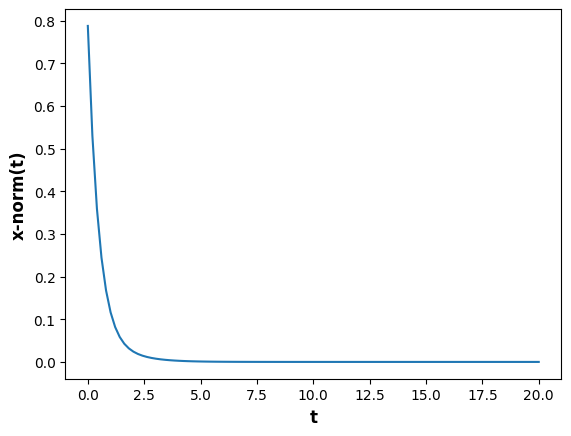

In [4]:
# Plot
for i in range(1, t.size):
   x[i, :] = r.integrate(t[i]) # get one more value, add it to the array
   x_norm[i] = np.linalg.norm(x[i,:]) 
   if not r.successful():
       raise RuntimeError("Could not integrate")

fig, ax = plt.subplots()
ax.plot(t, x_norm)

ax.set_xlabel('t', fontsize=12, fontweight='bold')
ax.set_ylabel('x-norm(t)', fontsize=12, fontweight='bold')